# Investigate the Titanic Data

In [1]:
# import all necessary packages and functions.
import csv
import numpy as np
import pandas as pd
from scipy import stats
from IPython.display import display
%matplotlib inline 
import matplotlib.pyplot as plt
import pylab as ply

## Background Information

In [2]:
# read in the data 
df = pd.read_csv("titanic-data.csv")

# preview of the data
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


### Explain the variables
		
- Survived: Survival (0 = No, 1 = Yes)
- Pclass: Ticket class (1 = Upper, 2 = Middle, 3 = Lower)
- Sex: Sex	
- Age: Age in years	
- Sibsp: Number of siblings or spouses aboard the Titanic	
- Parch: Number of parents or children aboard the Titanic	
- Ticket: Ticket number	
- Fare:	Passenger fare	
- Cabin: Cabin number	
- Embarked: Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)


In [3]:
# create label columns
df['Survival'] = df.Survived.map({0 : "Died", 1 : "Survived"})
df['Class'] = df.Pclass.map({1 : "First Class", 2 : "Second class", 3 : "Third Class"})
df['Ports'] = df.Embarked.map({"C" : "Cherbourg", "Q" : "Queenstown", "S" : "Southampton"})

# preview of the data
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Ports
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died,Third Class,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third Class,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died,Third Class,Southampton
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Died,Third Class,Queenstown


In [4]:
# view the information of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survival       891 non-null object
Class          891 non-null object
Ports          889 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


In [5]:
print ("Passengers survived: " + str(df['Survived'].sum()))
print ("Probability of survival: " + str(round(df['Survived'].mean() * 100, 2)) + "%")

Passengers survived: 342
Probability of survival: 38.38%


This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. Out of these 891 passengers and crew, 38.38% (342) of them survived. 

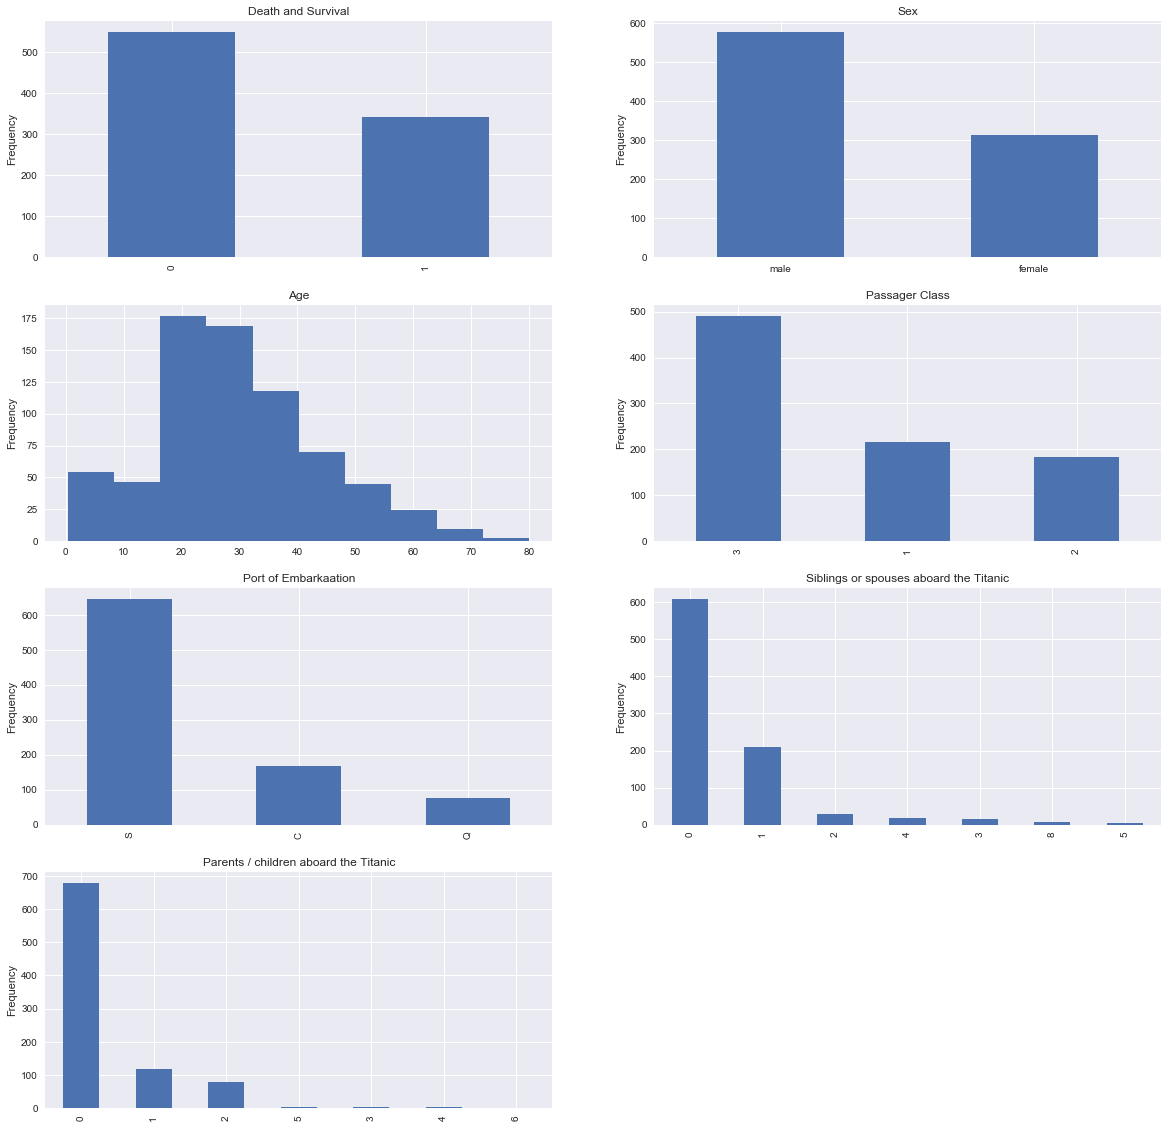

In [6]:
fig = ply.figure(figsize = (20, 20))
fig_dims = (4,2)

ply.subplot2grid(fig_dims, (0, 0))
df["Survived"].value_counts().plot(kind = "bar", title = "Death and Survival")
ply.ylabel('Frequency')

ply.subplot2grid(fig_dims, (0, 1))
df["Sex"].value_counts().plot(kind = "bar", title = "Sex")
ply.xticks(rotation = 0)
ply.ylabel('Frequency')

ply.subplot2grid(fig_dims, (1, 0))
df["Age"].plot(kind = "hist", title = "Age")

ply.subplot2grid(fig_dims, (1, 1))
df["Pclass"].value_counts().plot(kind = "bar", title = "Passager Class")
ply.ylabel('Frequency')

ply.subplot2grid(fig_dims, (2, 0))
df["Embarked"].value_counts().plot(kind = "bar", title = "Port of Embarkaation")
ply.ylabel('Frequency')

ply.subplot2grid(fig_dims, (2, 1))
df["SibSp"].value_counts().plot(kind = "bar", title = "Siblings or spouses aboard the Titanic")
ply.ylabel('Frequency')

ply.subplot2grid(fig_dims, (3, 0))
df["Parch"].value_counts().plot(kind = "bar", title = "Parents / children aboard the Titanic")
ply.ylabel('Frequency')

## What factors made people more likely to survive?
We would like to learn about factors that made people more likely to survive. We would try to investigate the following questions:
1. Whether gender would impact the chances of suvival? 
2. Which gender had a higher survival rate?
3. Whether ticket class would impact the chances of suvival? 
4. Which ticket class amoung upper, middle and lower classes had a higher suvival rate?
5. Whether age group would impact the chances of survival? 
6. Which age group had a higher suvival rate? 

### Question 1. Whether gender would impact the chances of suvival? 

In [7]:
# create a table of the number of survived and not survived passengers based on gender
sex_survived = pd.crosstab(df['Survived'], df['Sex'])
sex_survived.columns = ["Female", "Male"]
sex_survived.index = ["Not survived", "Survived"]
sex_survived

,Female,Male
Not survived,81,468
Survived,233,109


##### Hypothesis: 
H0: There was a difference in survival rate based on gender.

H1: There was a difference in survival rate based on gender.

Test: Chi Sqaure Test for Independence

In [8]:
# chi square
chi2, p, dof, expected = stats.chi2_contingency(sex_survived.values)
results = [['Chi-Square Test',chi2], ['P-Value', p]]
results

[['Chi-Square Test', 260.71702016732104], ['P-Value', 1.1973570627755645e-58]]

At a 5% significance level, we reject the hypothesis that there was no difference in survival rate based on gender.

### Question 2. Which gender among male and female had a higher survival rate?

In [9]:
# create a table of survival rate based on age group
sex_survived_q = pd.crosstab(df['Survived'], df['Sex']).apply(lambda r: r/r.sum(), axis = 0)
sex_survived_q.columns = ["Female", "Male"]
sex_survived_q.index = sex_survived.index = ["Not survived", "Survived"]
sex_survived_q

,Female,Male
Not survived,0.257962,0.811092
Survived,0.742038,0.188908


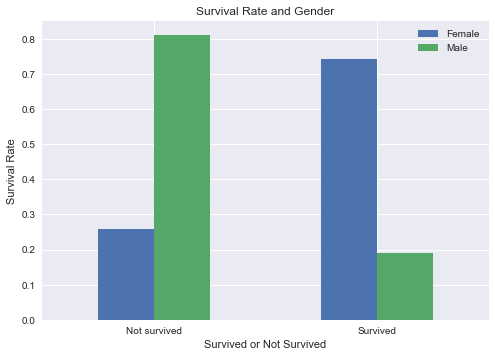

In [10]:
# create a graph for survived rate and gender
sex_survived_q.plot(kind = "bar", title = "Survival Rate and Gender")
ply.xticks(rotation = 0)
ply.ylabel('Survival Rate')
ply.xlabel('Survived or Not Survived')

The table and the graph show that female(74.20%) passengers had a higher survival rate than male(18.89%)passengers.

### Question 3. Whether ticket class would impact the chances of suvival? 

In [11]:
# create a table of the number of survived and not survived passengers based on ticket class
pclass_survived = pd.crosstab(df['Survived'],df['Pclass'])
pclass_survived.columns = ["Upper", "Middle", "Lower"]
pclass_survived.index = ["Not survived", "Survived"]
pclass_survived

,Upper,Middle,Lower
Not survived,80,97,372
Survived,136,87,119


#### Hypothesis: 
H0: There was no difference in survival rate based on ticket class.

H1: There was a difference in survival rate based on ticket class.

Test: Chi Sqaure Test for Independence

In [12]:
# chi square test
chi2, p, dof, expected = stats.chi2_contingency(pclass_survived.values)
results = [['Chi-Square Test',chi2], ['P-Value', p]]
results

[['Chi-Square Test', 102.88898875696056], ['P-Value', 4.5492517112987927e-23]]

At a 5% significance level, we reject the hypothesis that there was no difference in survival rate based on ticket class. 

### Question 4. Which ticket classes had a higher suvival rate?

In [13]:
# create a table of survial rate based on ticket class
pclass_survived_q = pd.crosstab(df['Survived'],df['Pclass']).apply(lambda r: r/r.sum(), axis = 0)
pclass_survived_q.columns = ["Upper", "Middle", "Lower"]
pclass_survived_q.index = ["Not survived", "Survived"]
pclass_survived_q

,Upper,Middle,Lower
Not survived,0.37037,0.527174,0.757637
Survived,0.62963,0.472826,0.242363


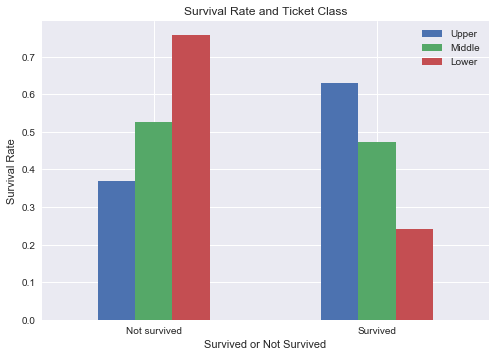

In [14]:
# create the graph for survival rate and ticket class 
pclass_survived_q.plot(kind = "bar", title = "Survival Rate and Ticket Class")
ply.xticks(rotation = 0)
ply.ylabel('Survival Rate')
ply.xlabel('Survived or Not Survived')

The table and the graph show that passengers from the upper(62.96%) class had the highest survival rate. And passangers from the lower(24.24%) class had the lowest survival rate. 

### Question 5. Whether age group would impact the chances of survival? 

In [15]:
# Copy a copy of the data
df_age = df.copy()

# drop the missing value
df_age = df_age.dropna(subset = ['Age'])

# information of the "Age" column
df_age['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# group the passenger by age (range = 10)
df_age['Age_group'] = pd.cut(df_age['Age'], np.arange(0, 81, 10))

In [17]:
# create a table of the number of survived and not survived passengers based on age group
age_survived = pd.crosstab(df_age['Survived'], df_age['Age_group'])
age_survived.columns = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"]
age_survived.index = ["Not survived", "Survived"]
age_survived

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80
Not survived,26,71,146,86,53,25,13,4
Survived,38,44,84,69,33,17,4,1


##### Hypothesis: 
H0: There was no difference in survival rate based on age group.

H1: There was a difference in survival rate based on age group.


Test: Chi Sqaure Test for Independence

In [18]:
# chi square test 
chi2, p, dof, expected = stats.chi2_contingency(age_survived.values)
results = [['Chi-Square Test',chi2], ['P-Value', p]]
results

[['Chi-Square Test', 15.296687749545693], ['P-Value', 0.03237887956708356]]

At a 5% significance level, we reject the hypothesis that there was no difference in survival rate based on age group.

### Questsion 6. Which age group had a higher suvival rate? 

In [19]:
# create a table of survival rate based on age group
age_survived_q = age_survived.div(age_survived.sum(1).astype(float), axis = 0).apply(lambda r: r/r.sum(), axis = 0)
age_survived_q.columns = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"]
age_survived_q.index = ["Not survived", "Survived"]
age_survived_q

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80
Not survived,0.318789,0.524639,0.543127,0.460182,0.523466,0.501452,0.689718,0.732323
Survived,0.681211,0.475361,0.456873,0.539818,0.476534,0.498548,0.310282,0.267677


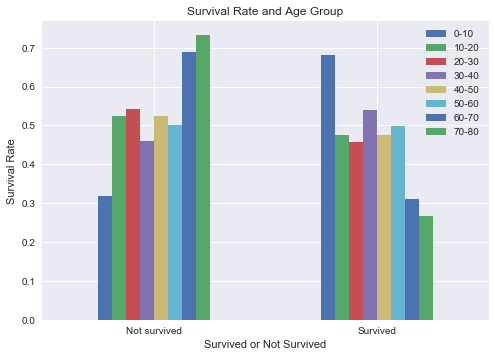

In [20]:
# create a graph for survival aate and age group
age_survived_q.plot(kind = "bar", title = "Survival Rate and Age Group")
ply.xticks(rotation = 0)
ply.ylabel('Survival Rate')
ply.xlabel('Survived or Not Survived')

The table and the graph show that passengers who were between 0-10 years old(68.12%) had the highest survival rate and passengers who were between 70-80 years old(26.76%) had the lowest survival rate.

## Conclusion 

We conclude that:
- Gender would impact the chances of suvival. 
- Female(74.20%) passengers had a higher survival rate than male(18.89%)passengers.
- Ticket class would impact the chances of suvival.
- Passengers from the upper(62.96%) class had the highest survival rate. And passangers from the lower(24.24%) class had the lowest survival rate. 
- Age group would impact the chances of suvival.
- Passengers who were between 0-10 years old(68.12%) had the highest survival rate and passengers who were between 70-80 years old(26.76%) had the lowest survival rate.

## Limitations 

There are a number of limitations with this dataset: 
- The dataset is filled with missing data, such as the age column missed 177(19. 87%) values.
- There were 2224 passengers and crew on board of Titnaic, but this dataset contains only information of 891 people.
- The dataset does not distinguish between passenger or crew. 
- The data in this dataset is from real data and is not from a controlled experiment. Therefore, we can only draw correlations between variables, and cannot draw any causal conclusions.
